## Darle un poquito mas de cariño ... no está del todo termiando

- Correlación de Pearson. Está dentro de [-1, 1]
$$Corr(x,y)=\frac{Cov(x,y)}{\sqrt{Var(x)}\sqrt{Var(y)}}$$

El cuadrado del coeficiente de correlación de Pearson es igual al coeficiente de determinación en un modelo de regresión lineal simple

- **Coeficiente de correlación de Pearson (r) →** cuantifica la fuerza y la dirección de la relación lineal. Si es lineal o no.
- **Coeficiente de determinación (R²) →** proporciona una medida de la calidad del modelo  lineal.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Coeficiente de determinación R^2: 0.8955490014275183
Parámetros del modelo lineal m: 99.39 | b: 7.93
Pearson correlation coefficient (r): 0.95
0.8955490014275183 0.8955490014275183


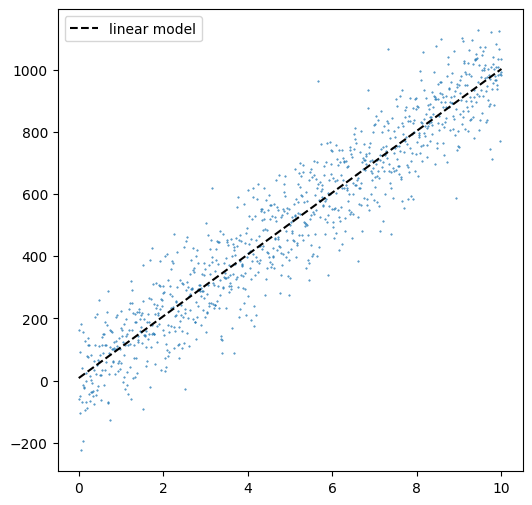

In [5]:
from sklearn.metrics import r2_score

np.random.seed(1)
data_n = 1000
x = np.linspace(0,10, data_n)
y = 100*x+1+np.random.normal(0, 100, data_n)

model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
y_pred = model.predict(x.reshape(-1, 1))
m = model.coef_
b = model.intercept_

r2 = r2_score(y, y_pred)
print("Coeficiente de determinación R^2:", r2)
print(f'Parámetros del modelo lineal m: {m[0]:.2f} | b: {b:.2f}')
print(f"Pearson correlation coefficient (r): {pearsonr(x, y)[0]:.2f}")
print(r2, pearsonr(x, y)[0]**2)

f, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y, s = .2)
ax.plot(x, m*x+b, color='black', label='linear model', linestyle='--')
plt.legend()
plt.show()

Coeficiente de determinación R^2 (mod. lin.): 0.79
Coeficiente de determinación R^2 (mod. pol.): 0.89
Coeficiente de determinación R^2 (mod. pol.): 0.93


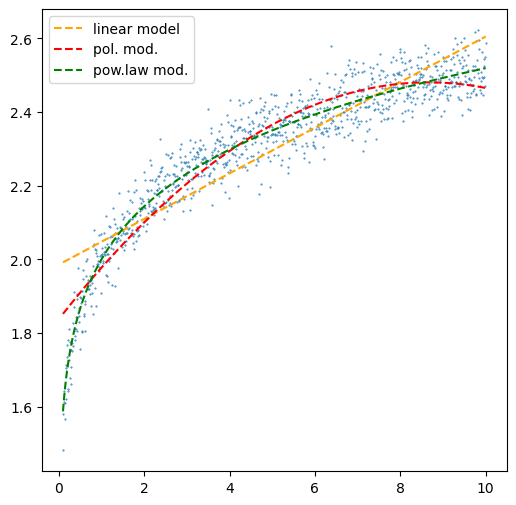

In [6]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
data_n = 1000
x = np.linspace(0.1,10, data_n)
y = 2*x**.1 + np.random.normal(0, .05, data_n)

### Lineal Regression 
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
y_pred = model.predict(x.reshape(-1, 1))
m = model.coef_
b_l = model.intercept_

r2 = r2_score(y, y_pred)
print(f"Coeficiente de determinación R^2 (mod. lin.): {r2:.2f}")
### Lineal Regression 

### Polynomial Regression 
poly  = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(x.reshape(-1, 1)) # Esto proporciona un array de data_nx2. Transfrma x a x^1 | x^2 | ...
lin2 = LinearRegression() 
lin2.fit(X_poly, y)
y_pred = lin2.predict(X_poly)
r2 = r2_score(y, y_pred)
print(f"Coeficiente de determinación R^2 (mod. pol.): {r2:.2f}")
### Polynomial Regression 


### power law
log_x = np.log(x)
log_y = np.log(y)
model = LinearRegression()
model.fit(log_x.reshape(-1, 1), log_y)
a = model.coef_[0]
b = model.intercept_
y_fit = np.exp(a * log_x + b) # porque si aplico np.exp al otro lado -> np.exp(np.log(y)) = y
r2 = r2_score(y, y_fit)
print(f"Coeficiente de determinación R^2 (mod. pol.): {r2:.2f}")
### power law

f, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y, s = .2)
ax.plot(x, m*x+b_l, color='orange', label='linear model', linestyle='--')
ax.plot(x, lin2.predict(X_poly), color = 'red', linestyle='--', label='pol. mod.')
ax.plot(x, y_fit, color = 'green', linestyle='--', label='pow.law mod.')
plt.legend()
plt.show()